In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# 가상 데이터 만들기
x = np.arange(0, 8, 0.1)
#x
y2 = np.cos(x)

In [83]:
sx = np.array([1.5, 3.0])
sy = np.array([0.0, -1.0])
colors = ['red', 'blue']

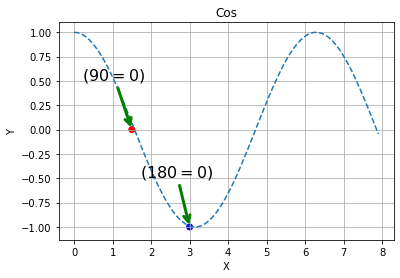

'\n<상관계수를 떠올리면 쉽다>\nθ=0 이면 cosθ = 1    : 상관관계가 있으면서 동일한 벡터이다. 유사도 1\nθ=90 이면 cosθ = 0   : 상관관계가 없다. 유사도 0\nθ=180 이면 cosθ = -1 : 상관관계가 있으면서 다른 벡터이다. 유사도 -1\n'

In [84]:
plt.plot(x, y2, linestyle='--', label='cos')

plt.annotate(r'$(90=0)$',xy=(sx[0],sy[0]),xycoords='data',xytext=(-50,50),
textcoords='offset points', fontsize=16,
arrowprops=dict(arrowstyle='->', linewidth=3,color='g'))

plt.annotate(r'$(180=0)$',xy=(sx[1],sy[1]),xycoords='data',xytext=(-50,50),
textcoords='offset points', fontsize=16,
arrowprops=dict(arrowstyle='->', linewidth=3,color='g'))

plt.scatter(sx, sy, color=colors)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Cos")
plt.grid(True)
plt.show()


"""
<상관계수를 떠올리면 쉽다>
θ=0 이면 cosθ = 1    : 상관관계가 있으면서 동일한 벡터이다. 유사도 1
θ=90 이면 cosθ = 0   : 상관관계가 없다. 유사도 0
θ=180 이면 cosθ = -1 : 상관관계가 있으면서 다른 벡터이다. 유사도 -1
"""

In [85]:
# 리스트 하나의 항목 -> 문서
docs = ['저는 자바 좋아요',
        '저는 파이썬 좋아요',
        '저는 파이썬 좋아요 저는 파이썬 좋아요']

In [86]:
import pandas as pd
# 중복된 값 제거하면서 하나의 단어씩 분할해서 리스트에 저장한다.
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['자바', '저는', '좋아요', '파이썬']

In [87]:
# count() : 문자열에서 주어진 단어의 빈도수 반환
str = "저는 파이썬 파이썬 자바 좋아요"
str.count('파이썬')

2

In [88]:
result = [] # 저장할 리스트 생성
for i in range(len(docs)):
    #print(docs[i])
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        # docs 문서 객체에서 각 문서에서 단어가 몇 번 출력 되는지 빈도수를 구해서 
        # 단어 행렬로 변경 후 리스트에 저장
        #print(d, ':[', t, ']:', d.count(t))
        result[-1].append(d.count(t))        
    #print('------------------')
    
result

[[1, 1, 1, 0], [0, 1, 1, 1], [0, 2, 2, 2]]

In [89]:
tf_data = pd.DataFrame(result, columns=vocab)
tf_data

,자바,저는,좋아요,파이썬
0,1,1,1,0
1,0,1,1,1
2,0,2,2,2


In [90]:
# 피타고라스 정리식(유클리안디거리)
# 꼭지점의 대변의 길이 c=5, c의 제곱 == 두 변의  A=4, B=3 제곱의 합과 같다

In [91]:
np.square(4) + np.square(3)

25

In [92]:
np.dot(4,5)

20

In [93]:
np.sqrt(np.square(5))

5.0

In [94]:
from numpy.linalg import norm

In [95]:
def cos_sim(A, B):
    return np.dot(A, B) / (norm(A) * norm(B))

In [96]:
# 판다스에서 값
doc1 = tf_data.loc[0].values
doc1

array([1, 1, 1, 0])

In [97]:
doc2 = tf_data.loc[1].values
doc2

array([0, 1, 1, 1])

In [98]:
doc3 = tf_data.loc[2].values
doc3

array([0, 2, 2, 2])

In [99]:
print(cos_sim(doc1, doc2)) # 문서 1과 2의 코사인 유사도

0.6666666666666667


In [100]:
print(cos_sim(doc1, doc3)) # 문서 1과 3의 코사인 유사도

0.6666666666666667


In [101]:
print(cos_sim(doc2, doc3)) # 문서 2과 3의 코사인 유사도

1.0000000000000002


In [102]:
# 리스트 하나의 항목 -> 문서
docs = ['저는 자바 좋아요',
        '저는 파이썬 좋아요',
        '저는 파이썬 좋아요 저는 파이썬 좋아요']

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
tfidf_vect_simple = TfidfVectorizer()

In [105]:
f_vect_simple = tfidf_vect_simple.fit_transform(docs)

In [106]:
f_vect_simple.shape

(3, 4)

In [107]:
type(f_vect_simple)

scipy.sparse.csr.csr_matrix

In [108]:
print(f_vect_simple)

  (0, 2)	0.4532946552278861
  (0, 0)	0.7674945674619879
  (0, 1)	0.4532946552278861
  (1, 3)	0.6732546652684398
  (1, 2)	0.5228423068642596
  (1, 1)	0.5228423068642596
  (2, 3)	0.6732546652684398
  (2, 2)	0.5228423068642596
  (2, 1)	0.5228423068642596


In [109]:
# 코사인 유사도 적용 -> 행렬로 변경
f_vect_dense = f_vect_simple.todense()
print(f_vect_dense)

[[0.76749457 0.45329466 0.45329466 0.        ]
 [0.         0.52284231 0.52284231 0.67325467]
 [0.         0.52284231 0.52284231 0.67325467]]


In [110]:
# 행렬을 우리가 정의한 cos_sim 에 벡터의 내적을 연산하기 위해서
# 인자값으로 벡터로 변환해서 전달하기 위함이다.

In [111]:
f_vect_dense[0]

matrix([[0.76749457, 0.45329466, 0.45329466, 0.        ]])

In [112]:
vect1 = np.array(f_vect_dense[0]).reshape(-1,)
vect1

array([0.76749457, 0.45329466, 0.45329466, 0.        ])

In [113]:
vect2 = np.array(f_vect_dense[1]).reshape(-1,)
vect2

array([0.        , 0.52284231, 0.52284231, 0.67325467])

In [114]:
def cos_sim(A,B):
    return np.dot(A,B)/(norm(A)*norm(B))

In [115]:
ss = cos_sim(vect1, vect2)
print('문장1, 문장2 Cosine 유사도 : {0:.3f}'.format(ss))

문장1, 문장2 Cosine 유사도 : 0.474


In [116]:
from sklearn.metrics.pairwise import cosine_similarity

In [117]:
ss = cosine_similarity(f_vect_simple[0], f_vect_simple[1])

In [118]:
# 첫 번째, 두 번째 문장의 유사도를 출력
print(ss)

[[0.47400325]]


In [119]:
# 두 번째, 세 번째 검증
ss = cosine_similarity(f_vect_simple[1], f_vect_simple[2])
print(ss)

[[1.]]


In [120]:
from konlpy.tag import Okt
okt = Okt()

In [121]:
train_data = pd.read_csv('dataset/MOVIEREV_DATA_TABLE.csv')
train_data.head(5)

,MIDX,MTITLE,MCONTENT,MPOINT,MDATE,MUSER
0,17071047,정직한 후보,유머 코드도 안맞는데 스토리까지 예상 범주 안쪽집중해서 보긴 뭐 하고 틀어 놓고 딴...,4,20200818,17071047
1,17071046,다만 악에서 구하소서,아진짜 솔직히 기대안하고 봤는데 너무 재미있고 특히 박정민배우님 너무 좋아요그리고 ...,10,20200818,17071046
2,17071045,오케이 마담,가족들이랑 보고왔는데 다들 넘 재미있데요 ~,10,20200818,17071045
3,17071044,오케이 마담,쓰래기 영화입니다 다들 두번씩 보세요,2,20200818,17071044
4,17071043,강철비2: 정상회담,잼있게봤어요!! 왜안보까. . .,8,20200818,17071043


In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 6 columns):
MIDX        10300 non-null int64
MTITLE      10300 non-null object
MCONTENT    10300 non-null object
MPOINT      10300 non-null int64
MDATE       10300 non-null int64
MUSER       10300 non-null int64
dtypes: int64(4), object(2)
memory usage: 482.9+ KB


In [123]:
train_data.isnull().sum()

MIDX        0
MTITLE      0
MCONTENT    0
MPOINT      0
MDATE       0
MUSER       0
dtype: int64

In [124]:
train_data.shape

(10300, 6)

In [125]:
"""
select count(*) from XXREVIEW
"""

'\nselect count(*) from XXREVIEW\n'

In [126]:
train_data['MTITLE'].drop_duplicates()

0                         정직한 후보
1                    다만 악에서 구하소서
2                         오케이 마담
4                     강철비2: 정상회담
5                  들어는 봤니? 모건 부부
6                             반도
9                      콰이어트 플레이스
12                        파이널리스트
13                          청년경찰
18                       사이더 하우스
19                           기생충
20                        작은 아씨들
21                          야구소녀
26                        기묘한 가족
30                         사라진 밤
34                        러빙 빈센트
35                             돈
36                            툴리
37              지푸라기라도 잡고 싶은 짐승들
39                       나의 소녀시대
40                           메소드
43                          유랑지구
45                         #살아있다
46                골 2: 꿈을 향해 뛰어라
47                           말모이
48                           백두산
50                     가구야공주 이야기
52                      돈 크라이 마미
57                          코드 8
58                         작은 소망
          

In [127]:
train_data['MCONTENT'].isnull().sum()

0

In [128]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['MCONTENT'] = train_data['MCONTENT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")

In [129]:
stopword = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자']

In [137]:
def tokenizer(raw, pos=["Noun", "Alpha", "Verb", "Number"]):
    return [
        word for word, tag in okt.pos(raw, norm=True, stem=True)
        if len(word) > 1 and tag in pos and word not in stopword
    ]

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopword)

In [133]:
tfidf_matrix = tfidf.fit_transform(train_data['MCONTENT'])

KeyboardInterrupt: 

In [ ]:
tfidf_matrix.shape

In [136]:
from sklearn.metrics.pairwise import cosine_similarity
consine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

NameError: name 'tfidf_matrix' is not defined